In [1]:
from keras import datasets, Sequential
from keras.layers import Conv2D,Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
(xtr, ytr),(xt,yt)=datasets.cifar100.load_data()

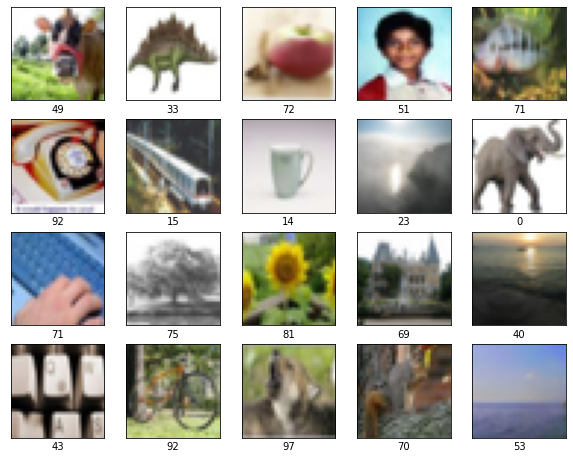

In [4]:
#converting 2D array output into 1D array
ytr= ytr.reshape(-1,)
yt=yt.reshape(-1,)
#plot a sample from the training class
plt.figure(figsize=(10,10))
for image in range(0,20):
    i=image
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+0
    data_plot= xtr[j]
    plt.imshow(data_plot)
    plt.xlabel(str(yt[j]))
plt.show()



In [5]:
# normalizing the training and testing data
xtr=xtr/255
xt=xt/255

model= Sequential()
model.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(2, 2), padding='same', strides=(2,2),filters=3))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Conv2D(kernel_size=(2, 2), padding='same', strides=(2,2),filters=64))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.summary()
opt='adam'
model.compile(loss='sparse_categorical_crossentropy', optimizer= opt, metrics= ['accuracy'])






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 3)         39        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1048832   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
______

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/25
50000/50000 [==============================] - 46s 923us/step - loss: 3.5802 - acc: 0.1608
Epoch 2/25
50000/50000 [==============================] - 53s 1ms/step - loss: 2.9974 - acc: 0.2629
Epoch 3/25
50000/50000 [==============================] - 47s 947us/step - loss: 2.7199 - acc: 0.3143
Epoch 4/25
50000/50000 [==============================] - 48s 960us/step - loss: 2.4991 - acc: 0.3600
Epoch 5/25
50000/50000 [==============================] - 51s 1ms/step - loss: 2.2887 - acc: 0.4026
Epoch 6/25
50000/50000 [==============================] - 45s 896us/step - loss: 2.0907 - acc: 0.4443
Epoch 7/25
50000/50000 [==============================] - 63s 1ms/step - loss: 1.8996 - acc: 0.4863
Epoch 8/25
50000/50000 [==============================] - 57s 1ms/step - loss: 1.7078 - acc: 0.5300
Epoch 9/25
50000/50000 [==============================] - 56s 1ms/step - loss: 1.5308 - acc: 0.57

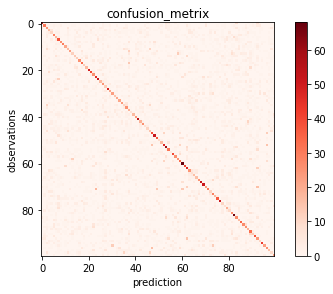

In [6]:
model.fit(xtr, ytr, epochs=25)
test_loss,test_acc= model.evaluate(xt,yt)
print("Test accuracy: ", test_acc)
def plot_confusion_metrix(cm,classes, normalize=True,
                         title='confusion_metrix', cmap= plt.cm.Reds):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if normalize:
        cm=cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
    plt.tight_layout()
    plt.ylabel('observations')
    plt.xlabel('prediction')
Y_pred= model.predict(xt)
Y_pred_classes= np.argmax(Y_pred, axis=1)
confusion_mtx= confusion_matrix(yt,Y_pred_classes )
plot_confusion_metrix(confusion_mtx, classes= range(100))

          